In [5]:
import torch
import pdb

In [30]:
value = torch.randn((56,120,512))
attn = torch.rand(56,143,120)

In [35]:
def compute_regularization_entropy(attn, value):
    value_norm = value.norm(p=2, dim=2)
    a_fx_norm2 = value_norm.unsqueeze(1) * attn
    #pdb.set_trace()
    # 标准化到0-1
    a_fx_norm2_sum = a_fx_norm2.sum(keepdim=True, dim=2)
    a_fx_norm2 = a_fx_norm2 / a_fx_norm2_sum
    # 计算熵
    ent_a_fx = ((-1) * a_fx_norm2 * torch.log(a_fx_norm2+1e-6)).sum().type_as(attn)
    return ent_a_fx
    

compute_regularization_entropy(attn,value)

tensor(36793.1133)

In [20]:
x = torch.Tensor([1,2,3,4,5])
y = torch.Tensor([1,2,3,4,5])

not (0 == (x!=y).sum())

False

In [19]:
a = torch.zeros(3,2,3)
a[:, 0:-1, :].shape

torch.Size([3, 1, 3])

In [9]:
value = torch.randn((56,120,512))
attn = torch.randn((56,143,120))
value_norm = value.norm(p=2, dim=2)
res = torch.zeros(value.shape[0], attn.shape[1])

In [16]:
for batch in range(value.shape[0]):
    for tgt in range(attn.shape[1]):
        max_norm = 0
        for w in range(attn.shape[2]):
            max_norm = max(attn[batch][tgt][w]*value_norm[batch][w], max_norm)
            #print(attn[batch][tgt][w]*value_norm[batch][w])
        res[batch][tgt] = max_norm

In [17]:
(res.sum()/(res.shape[0]*res.shape[1])) * 0.005

tensor(0.2910)

In [24]:
res2 = value_norm.unsqueeze(1) * attn
res2.max(dim=2)[0].sum()

In [20]:
def compute_attn_df(attn_weights):
    cat_vec = torch.zeros(attn_weights.shape[0], 1, attn_weights.shape[2])
    subtractor = attn_weights[:, :-1, :]
    subtractor = torch.cat((cat_vec, subtractor), dim=1)
    return attn_weights - subtractor

In [25]:
attn_weights = torch.Tensor([
    [
        [1,6,1],
        [2,2,2],
        [3,6,3]
    ],
    [
        [4,4,4],
        [5,5,5],
        [6,6,6]
    ]
])
compute_attn_df(attn_weights)

tensor([[[ 1.,  6.,  1.],
         [ 1., -4.,  1.],
         [ 1.,  4.,  1.]],

        [[ 4.,  4.,  4.],
         [ 1.,  1.,  1.],
         [ 1.,  1.,  1.]]])

In [26]:
def compute_prev(q):
    cat = torch.zeros(q.shape[0], 1, q.shape[2]).to(q.device).half()
    prev = q[:, :-1, :]
#pdb.set_trace()
    prev = torch.cat((cat, prev), dim=1)
    return prev

In [3]:
import torch

a = torch.tensor(1)
float(a)

1.0

In [24]:
value = torch.ones(2,3,4)
attn = torch.arange(36).reshape(2,6,3)

print(value)
print(attn.shape)

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])
torch.Size([2, 6, 3])


In [25]:
attn

tensor([[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8],
         [ 9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]],

        [[18, 19, 20],
         [21, 22, 23],
         [24, 25, 26],
         [27, 28, 29],
         [30, 31, 32],
         [33, 34, 35]]])

In [17]:
def compute_regularization(attn, value):
    value_norm = value.norm(p=2, dim=2)
    reg = value_norm.unsqueeze(1) * attn
    reg = reg.max(dim=2)[0]
    denominator = value_norm.max(dim=1)[0].unsqueeze(1)
    return (reg/denominator).sum()
# compute_regularization(attn,value)

In [6]:
import math

In [18]:
a = torch.tensor([
    [
        [0.8,0.1,0.1],
        [0.4,0.3,0.3]
    ],
    [
        [0.7,0.2,0.1],
        [0.6,0.3,0.1]
    ]
])

In [19]:
b = torch.tensor([
    [
        [0.2,0.2,0.2,0.2,0.2],
        [0.3,0.3,0.3,0.3,0.3],
        [0.8,0.8,0.8,0.8,0.8],
    ],
    [
        [0.2,0.2,0.2,0.2,0.2],
        [0.3,0.3,0.3,0.3,0.3],
        [0.8,0.8,0.8,0.8,0.8],
    ]
])

In [30]:
compute_regularization(a,b)

tensor(11648.8193)

In [29]:
b = torch.randn(448,18,512)
a = torch.randn(448,15,18)

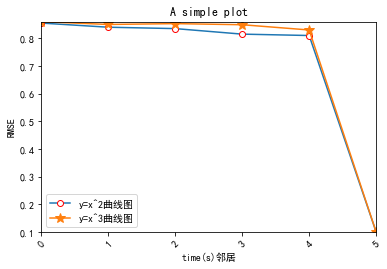

In [33]:
import matplotlib.pyplot as plt
from pylab import *                                 #支持中文
mpl.rcParams['font.sans-serif'] = ['SimHei']

y = [0.855, 0.84, 0.835, 0.815, 0.81,0.1]
y1=[0.86,0.85,0.853,0.849,0.83,0.1]
names = range(len(y))
x = range(len(names))
plt.plot(x, y, marker='o', mec='r', mfc='w',label=u'y=x^2曲线图')
plt.plot(x, y1, marker='*', ms=10,label=u'y=x^3曲线图')
plt.legend()  # 让图例生效
plt.xticks(x, names, rotation=45)
plt.margins(0)
plt.subplots_adjust(bottom=0.15)
plt.xlabel(u"time(s)邻居") #X轴标签
plt.ylabel("RMSE") #Y轴标签
plt.title("A simple plot") #标题

plt.show()

In [34]:
import pandas as pd

In [38]:
reg_term = [0.1,0.2]
loss_trans=[0.3,0.4]
write_reg = pd.DataFrame(data=np.array(reg_term))
write_loss = pd.DataFrame(np.array(loss_trans))
write_reg.to_csv('./reg.csv')
write_reg.to_csv('./loss_orign.csv')

In [40]:
import pdb

def compute_regularization_add(attn, value, coe):
    value_norm = value.norm(p=2, dim=2)
    reg = value_norm.unsqueeze(1) * attn
    reg = reg.max(dim=2)[0].sum()
    pdb.set_trace()
    denominator = attn @ value_norm
    denominator = reg.sum()
    return (reg/denominator) * (-1) * coe

In [41]:
def compute_regularization_add(attn, value, coe):
    value_norm = value.norm(p=2, dim=2)
    reg = value_norm.unsqueeze(1) * attn
    reg = reg.max(dim=2)[0].sum()
    pdb.set_trace()
    denominator = attn @ value_norm
    denominator = reg.sum()
    return (reg/denominator) * (-1) * coe
    
a = torch.tensor([
    [
        [0.8,0.1,0.1],
        [0.4,0.3,0.3]
    ],
    [
        [0.7,0.2,0.1],
        [0.6,0.3,0.1]
    ]
])

b = torch.tensor([
    [
        [0.2,0.2,0.2,0.2,0.2],
        [0.3,0.3,0.3,0.3,0.3],
        [0.8,0.8,0.8,0.8,0.8],
    ],
    [
        [0.2,0.2,0.2,0.2,0.2],
        [0.3,0.3,0.3,0.3,0.3],
        [0.8,0.8,0.8,0.8,0.8],
    ]
])
compute_regularization_add(a,b,1)

In [46]:
def compute_regularization_add(attn, value, coe):
    value_norm = value.norm(p=2, dim=2)
    reg = value_norm.unsqueeze(1) * attn
    reg = reg.max(dim=2)[0].sum()
    #print(attn.shape, value_norm.shape)
    denominator = attn @ value_norm.T
    #print(denominator)
    denominator = denominator.sum()
    #print(denominator)
    return (reg/denominator) * (-1) * coe
    
a = torch.tensor([
    [
        [0.8,0.1,0.1],
        [0.4,0.3,0.3]
    ],
    [
        [0.7,0.2,0.1],
        [0.6,0.3,0.1]
    ]
])

b = torch.tensor([
    [
        [0.2,0.2,0.2,0.2,0.2],
        [0.3,0.3,0.3,0.3,0.3],
        [0.8,0.8,0.8,0.8,0.8],
    ],
    [
        [0.2,0.2,0.2,0.2,0.2],
        [0.3,0.3,0.3,0.3,0.3],
        [0.8,0.8,0.8,0.8,0.8],
    ]
])
compute_regularization_add(a,b,1)

torch.Size([2, 2, 3]) torch.Size([2, 3])
tensor([[[0.6037, 0.6037],
         [0.9168, 0.9168]],

        [[0.6261, 0.6261],
         [0.6485, 0.6485]]])
tensor(5.5902)


tensor(-0.2640)